In [1]:
# pip install lightgbm

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [3]:
combined_df=pd.DataFrame()
for i in range(15):
    filename = f"stl_이상치처리데이터2\stn{i}.csv"  # 각 데이터프레임 파일 이름
    df = pd.read_csv(filename)  # 파일로부터 데이터프레임 읽기
    combined_df = combined_df.append(df, ignore_index=True)
combined_df

C:\Users\JAE\AppData\Local\Temp\ipykernel_3908\2533716594.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\JAE\AppData\Local\Temp\ipykernel_3908\2533716594.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\JAE\AppData\Local\Temp\ipykernel_3908\2533716594.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\JAE\AppData\Local\Temp\ipykernel_3908\2533716594.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df,

,Datetime,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,지면온도(°C),solaraa,풍향_cos,풍향_sin,uv,lon,lat,sateza,height,landtype
0,2020-01-01 00:00:00,0.000413,0.000098,0.000084,-0.000903,0.000155,-0.000075,3.073563,0.312385,0.752173,...,-0.005496,1.647369,0.006151,-0.009737,0.0,126.16000,33.30000,38.96359,71.0,0.0
1,2020-01-01 00:10:00,-0.000288,-0.000060,0.001209,-0.000193,-0.000186,0.000004,0.664371,0.429766,0.754047,...,0.006308,0.419671,0.007178,-0.015350,0.0,126.16000,33.30000,38.96359,71.0,0.0
2,2020-01-01 00:20:00,0.000282,0.000263,-0.000243,0.000241,0.000071,0.000003,1.158467,0.557154,0.831468,...,0.011819,-0.644961,0.003861,-0.008926,0.0,126.16000,33.30000,38.96359,71.0,0.0
3,2020-01-01 00:30:00,-0.000163,0.000259,0.000065,0.000267,-0.000627,-0.000231,1.642745,0.674040,0.903232,...,0.009208,-1.483783,-0.038804,0.106167,0.0,126.16000,33.30000,38.96359,71.0,0.0
4,2020-01-01 00:40:00,-0.000775,-0.000225,-0.000679,-0.000544,-0.000204,0.000078,1.217984,0.464763,0.693264,...,0.000811,-2.030602,0.010571,-0.032012,0.0,126.16000,33.30000,38.96359,71.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,2021-12-31 23:10:00,-0.000400,0.000197,-0.000621,0.000088,-0.000137,0.000006,0.775256,0.132466,0.296562,...,-0.044458,-2.464096,-0.098003,-0.235962,0.0,126.38121,34.81689,40.67788,38.0,3.0
1578956,2021-12-31 23:20:00,0.000257,0.000154,-0.000717,0.000224,0.000305,-0.000203,-0.202003,0.161890,0.194591,...,-0.016148,-3.528468,0.026316,0.140172,0.0,126.38121,34.81689,40.67788,38.0,3.0
1578957,2021-12-31 23:30:00,0.000217,-0.000001,0.000684,0.000109,-0.000090,0.000444,0.394724,-0.102045,0.120780,...,0.009134,-4.637053,0.002573,0.106847,0.0,126.38121,34.81689,40.67788,38.0,3.0
1578958,2021-12-31 23:40:00,-0.000246,-0.000015,0.000617,0.000006,-0.000280,0.000189,0.280665,-0.202832,-0.195031,...,0.023442,-5.721492,0.016953,-0.039591,0.0,126.38121,34.81689,40.67788,38.0,3.0


In [4]:
combined_df['Datetime'] = pd.to_datetime(combined_df['Datetime'])

In [5]:
combined_df['Year'] = combined_df['Datetime'].dt.year
combined_df['Month'] = combined_df['Datetime'].dt.month

In [6]:
test = combined_df[(combined_df['Year'] == 2021) & (combined_df['Month'] == 6)]
test

,Datetime,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,풍향_cos,풍향_sin,uv,lon,lat,sateza,height,landtype,Year,Month
74448,2021-06-01 00:00:00,-0.000240,-0.000291,-0.000538,-0.000248,-0.000025,0.000019,-0.018169,-0.107508,0.039610,...,-0.036019,-0.098883,0.0,126.16000,33.30000,38.96359,71.0,0.0,2021,6
74449,2021-06-01 00:10:00,-0.000078,-0.000238,-0.000216,0.000075,-0.000132,-0.000023,0.374429,0.035416,0.344470,...,-0.026191,-0.071871,0.0,126.16000,33.30000,38.96359,71.0,0.0,2021,6
74450,2021-06-01 00:20:00,-0.000226,-0.000051,0.000283,0.000057,-0.000016,0.000055,0.321459,-0.065380,0.084711,...,0.044943,0.123545,0.0,126.16000,33.30000,38.96359,71.0,0.0,2021,6
74451,2021-06-01 00:30:00,-0.000247,0.000312,-0.000021,-0.000114,-0.000437,0.000206,0.383279,-0.346479,-0.201427,...,0.057089,0.156876,0.0,126.16000,33.30000,38.96359,71.0,0.0,2021,6
74452,2021-06-01 00:40:00,-0.000287,0.000213,-0.000642,0.000144,0.000189,-0.000137,-0.684031,-0.631444,-1.047034,...,0.069675,0.191417,0.0,126.16000,33.30000,38.96359,71.0,0.0,2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552459,2021-06-30 23:10:00,-0.000083,0.000038,-0.000993,0.000508,0.000195,-0.000103,0.802919,1.078785,1.180624,...,0.092260,-0.118463,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,6
1552460,2021-06-30 23:20:00,0.000071,0.000035,0.000564,-0.000347,0.000301,-0.000222,1.128810,0.855484,1.238656,...,0.116830,-0.230863,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,6
1552461,2021-06-30 23:30:00,0.000025,0.000107,0.000439,-0.000455,-0.000230,-0.000131,-0.163198,0.300074,0.410833,...,0.065776,-0.273804,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,6
1552462,2021-06-30 23:40:00,-0.000197,0.000041,-0.000137,-0.000182,-0.000211,-0.000019,2.107131,1.053940,1.848050,...,0.049934,-0.286799,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,6


In [7]:
train = combined_df[~((combined_df['Year'] == 2021) & (combined_df['Month'] == 6))]
train

,Datetime,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,풍향_cos,풍향_sin,uv,lon,lat,sateza,height,landtype,Year,Month
0,2020-01-01 00:00:00,0.000413,0.000098,0.000084,-0.000903,0.000155,-0.000075,3.073563,0.312385,0.752173,...,0.006151,-0.009737,0.0,126.16000,33.30000,38.96359,71.0,0.0,2020,1
1,2020-01-01 00:10:00,-0.000288,-0.000060,0.001209,-0.000193,-0.000186,0.000004,0.664371,0.429766,0.754047,...,0.007178,-0.015350,0.0,126.16000,33.30000,38.96359,71.0,0.0,2020,1
2,2020-01-01 00:20:00,0.000282,0.000263,-0.000243,0.000241,0.000071,0.000003,1.158467,0.557154,0.831468,...,0.003861,-0.008926,0.0,126.16000,33.30000,38.96359,71.0,0.0,2020,1
3,2020-01-01 00:30:00,-0.000163,0.000259,0.000065,0.000267,-0.000627,-0.000231,1.642745,0.674040,0.903232,...,-0.038804,0.106167,0.0,126.16000,33.30000,38.96359,71.0,0.0,2020,1
4,2020-01-01 00:40:00,-0.000775,-0.000225,-0.000679,-0.000544,-0.000204,0.000078,1.217984,0.464763,0.693264,...,0.010571,-0.032012,0.0,126.16000,33.30000,38.96359,71.0,0.0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,2021-12-31 23:10:00,-0.000400,0.000197,-0.000621,0.000088,-0.000137,0.000006,0.775256,0.132466,0.296562,...,-0.098003,-0.235962,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,12
1578956,2021-12-31 23:20:00,0.000257,0.000154,-0.000717,0.000224,0.000305,-0.000203,-0.202003,0.161890,0.194591,...,0.026316,0.140172,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,12
1578957,2021-12-31 23:30:00,0.000217,-0.000001,0.000684,0.000109,-0.000090,0.000444,0.394724,-0.102045,0.120780,...,0.002573,0.106847,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,12
1578958,2021-12-31 23:40:00,-0.000246,-0.000015,0.000617,0.000006,-0.000280,0.000189,0.280665,-0.202832,-0.195031,...,0.016953,-0.039591,0.0,126.38121,34.81689,40.67788,38.0,3.0,2021,12


In [8]:
train = train.drop(['Year', 'Month'], axis=1)
test = test.drop(['Year', 'Month'], axis=1)

In [9]:
train_data = lgb.Dataset(train.drop(['Datetime', 'uv'], axis=1), label=train['uv'])
test_data = lgb.Dataset(test.drop(['Datetime', 'uv'], axis=1), label=test['uv'])

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 16,
    'num_leaves': 144,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7
}

In [10]:
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=100, verbose_eval=100)
fold1_rmse = mean_squared_error(test['uv'], model.predict(test.drop(['Datetime', 'uv'], axis=1)), squared=False)

train_pred = model.predict(train.drop(['Datetime', 'uv'], axis=1))
train_rmse = mean_squared_error(train['uv'], train_pred, squared=False)

print(f"Fold 1 Validation RMSE: {fold1_rmse:.4f}")
print(f"Fold 1 Train RMSE: {train_rmse:.4f}")

C:\Users\JAE\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\JAE\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.209896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8228
[LightGBM] [Info] Number of data points in the train set: 1514160, number of used features: 37
[LightGBM] [Info] Start training from score 1.095996
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 1.83832
[200]	valid_0's rmse: 1.52836
[300]	valid_0's rmse: 1.41061
[400]	valid_0's rmse: 1.35461
[500]	valid_0's rmse: 1.32068
[600]	valid_0's rmse: 1.29992
[700]	valid_0's rmse: 1.28388
[800]	valid_0's rmse: 1.27068
[900]	valid_0's rmse: 1.25992
[1000]	valid_0's rmse: 1.25134
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.25134
Fold 1 Validation RMSE: 1.2513
Fold 1 Train RMSE: 0.8211


In [11]:
cdf = pd.read_csv("찐결측처리데이터/combined_df.csv",index_col=0)
cdf

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.000000,-4.898587e-15
1,2020-01-01 00:10:00,126.16000,33.30000,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.000000,-4.898587e-15
2,2020-01-01 00:20:00,126.16000,33.30000,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.000000,-4.898587e-15
3,2020-01-01 00:30:00,126.16000,33.30000,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.000000,-4.898587e-15
4,2020-01-01 00:40:00,126.16000,33.30000,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.000000,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,2021-12-31 23:10:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00089,-0.00015,-0.0003,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-65.69170,45,0.173648,-9.848078e-01
1578956,2021-12-31 23:20:00,126.38121,34.81689,0.0,0.00000,0.00000,-0.00149,0.00015,0.0000,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-67.56294,45,0.173648,-9.848078e-01
1578957,2021-12-31 23:30:00,126.38121,34.81689,0.0,0.00000,0.00000,0.00000,0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-69.37752,45,0.173648,-9.848078e-01
1578958,2021-12-31 23:40:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-71.11812,45,0.173648,-9.848078e-01


In [12]:
cdf['Datetime'] = pd.to_datetime(cdf['Datetime'])
cdf['Year'] = cdf['Datetime'].dt.year
cdf['Month'] = cdf['Datetime'].dt.month
test = cdf[(cdf['Year'] == 2021) & (cdf['Month'] == 6)]
train = cdf[~((cdf['Year'] == 2021) & (cdf['Month'] == 6))]
train = train.drop(['Year', 'Month','해발고도'], axis=1)
test = test.drop(['Year', 'Month','해발고도'], axis=1)
train_data = lgb.Dataset(train.drop(['Datetime', 'uv'], axis=1), label=train['uv'])
test_data = lgb.Dataset(test.drop(['Datetime', 'uv'], axis=1), label=test['uv'])

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 16,
    'num_leaves': 144,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7
}
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=100, verbose_eval=100)
fold1_rmse = mean_squared_error(test['uv'], model.predict(test.drop(['Datetime', 'uv'], axis=1)), squared=False)

train_pred = model.predict(train.drop(['Datetime', 'uv'], axis=1))
train_rmse = mean_squared_error(train['uv'], train_pred, squared=False)

print(f"Fold 1 Test RMSE: {fold1_rmse:.4f}")
print(f"Fold 1 Train RMSE: {train_rmse:.4f}")


C:\Users\JAE\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\JAE\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6960
[LightGBM] [Info] Number of data points in the train set: 1514160, number of used features: 37
[LightGBM] [Info] Start training from score 1.095996
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 1.28001
[200]	valid_0's rmse: 0.922223
[300]	valid_0's rmse: 0.862694
[400]	valid_0's rmse: 0.84946
[500]	valid_0's rmse: 0.841231
[600]	valid_0's rmse: 0.835888
[700]	valid_0's rmse: 0.831561
[800]	valid_0's rmse: 0.82938
[900]	valid_0's rmse: 0.82803
[1000]	valid_0's rmse: 0.826973
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.826973
Fold 1 Test RMSE: 0.8270
Fold 1 Train RMSE: 0.4905


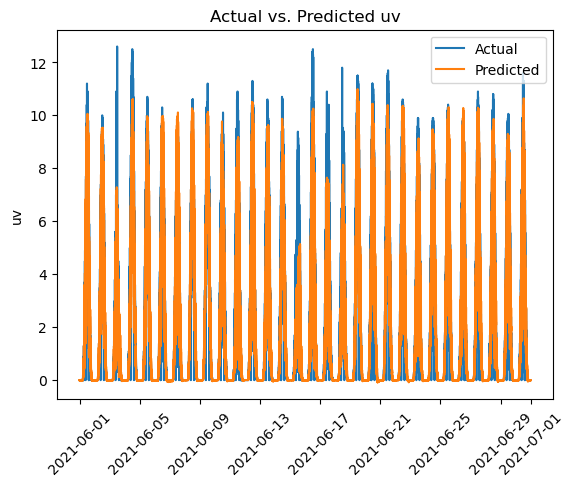

In [13]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교를 위한 데이터 준비
test['uv_pred'] = model.predict(test.drop(['Datetime', 'uv'], axis=1))

# 날짜 기준으로 데이터 정렬
test = test.sort_values('Datetime')

# 그래프 그리기
plt.plot(test['Datetime'], test['uv'], label='Actual')
plt.plot(test['Datetime'], test['uv_pred'], label='Predicted')

plt.ylabel('uv')
plt.title('Actual vs. Predicted uv')
plt.legend()
plt.xticks(rotation=45)
plt.show()